Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Reading the testing and training datasets

In [2]:
train=pd.read_csv("Titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv("Titanic_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


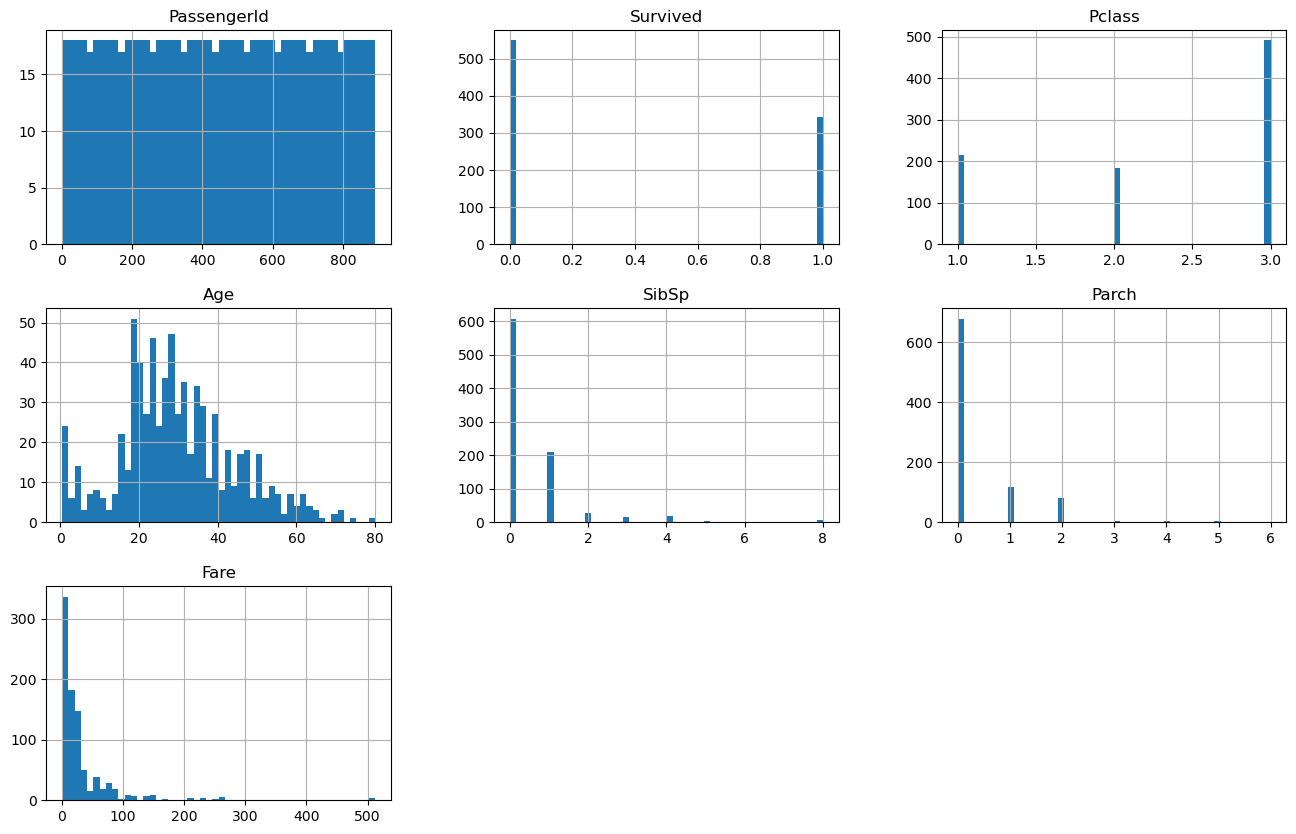

In [8]:
train.hist(bins=50,figsize=(16,10))
plt.show()

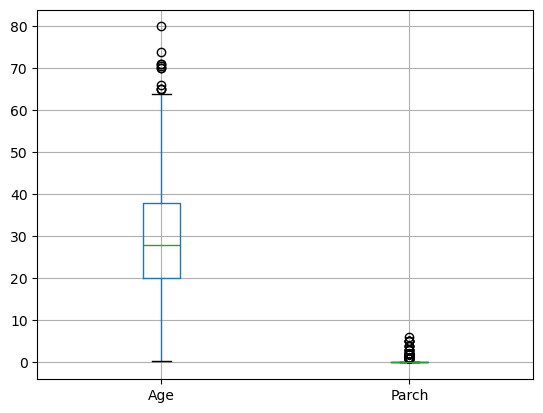

In [9]:
train.boxplot(column=['Age','Parch'])
plt.show()

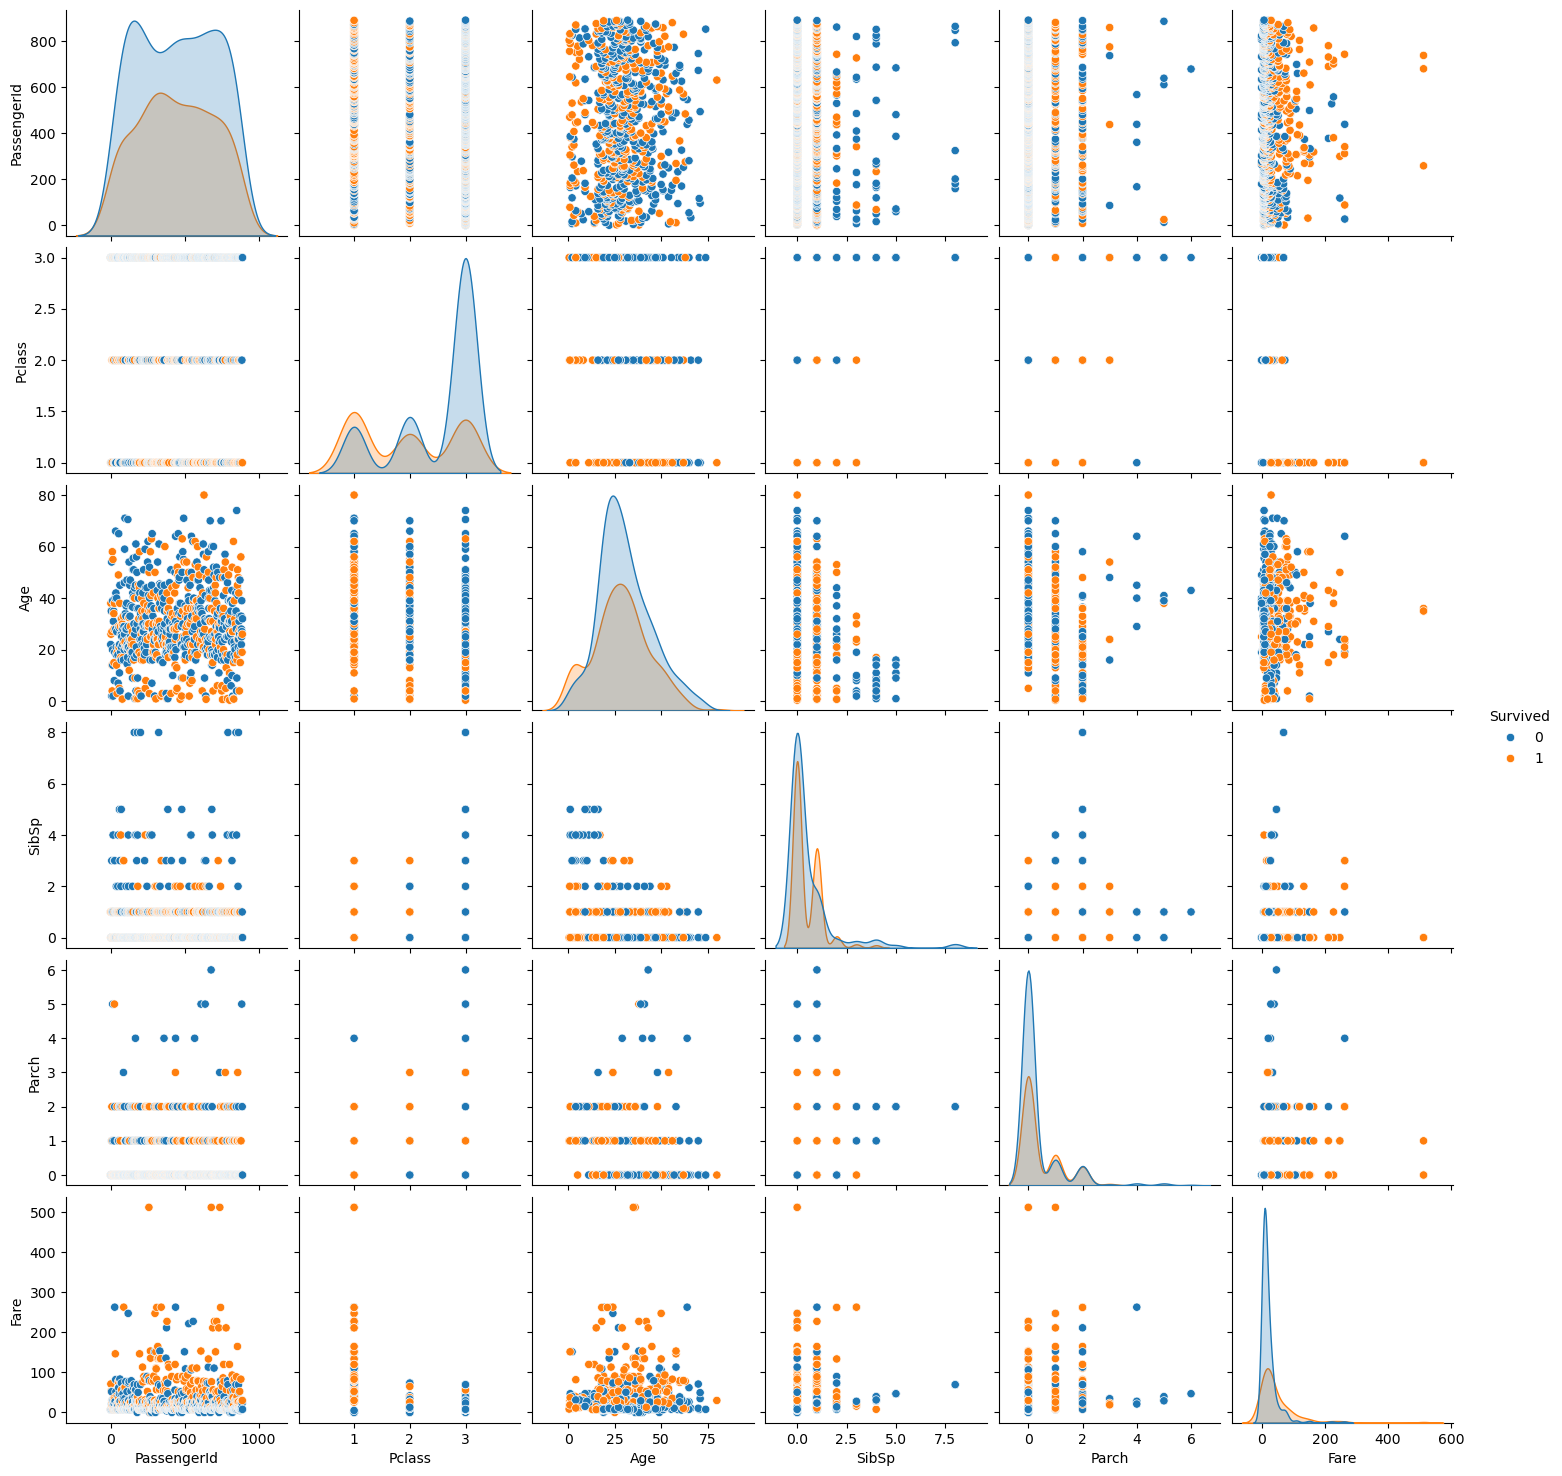

In [10]:
sns.pairplot(train, hue='Survived')
plt.show()

# corr = train.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
# plt.show()

In [11]:
train['Age']=train["Age"].fillna(train['Age'].mean())
test['Age']=test["Age"].fillna(test['Age'].mean())

In [12]:
train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked'])
test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked'])

In [13]:
train

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,False,False,True,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,True,False,False,True,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,True,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,True,False,False,True,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,False,True,False,False,True,False,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,True,False,False,True,False,False,False,True
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,False,False,True,True,False,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,True,False,False,False,True,True,False,False


In [14]:
test

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,False,False,True,False,True,False,True,False
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,False,False,True,True,False,False,False,True
2,894,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,False,True,False,False,True,False,True,False
3,895,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,False,False,True,False,True,False,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,False,False,True,False,True,False,False,True
414,1306,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,True,False,False,True,False,True,False,False
415,1307,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,False,False,True,False,True,False,False,True
416,1308,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,NaN,False,False,True,False,True,False,False,True


In [15]:
x = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1-score: 0.7464788732394366
ROC-AUC score: 0.7866795366795367


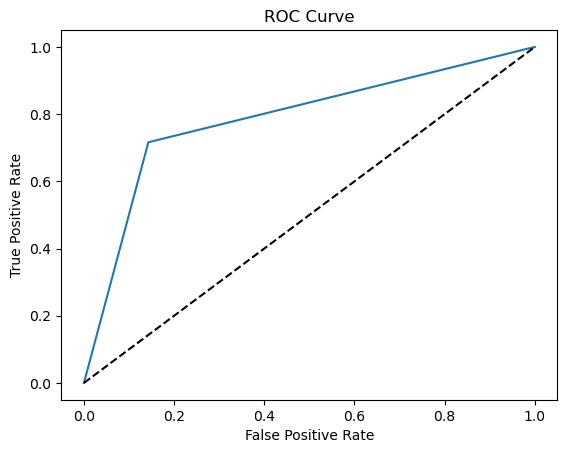

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

y_pred = model.predict(x_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-score:", f1_score(y_val, y_pred))
print("ROC-AUC score:", roc_auc_score(y_val, y_pred))

fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [18]:
print("cofficients:",model.coef_)

cofficients: [[-2.98846558e-02 -2.93185265e-01 -1.30800354e-01  3.59025919e-03
   7.39738515e-01  2.41010001e-01 -9.80059918e-01  1.31750064e+00
  -1.31681204e+00  1.32800792e-01  7.02021637e-04 -3.52231355e-01]]


# print("Feature importance:", model.feature_importances_)

In [19]:
import streamlit as st
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler
import pickle
from sklearn.linear_model import LogisticRegression

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Pclass_1     891 non-null    bool   
 10  Pclass_2     891 non-null    bool   
 11  Pclass_3     891 non-null    bool   
 12  Sex_female   891 non-null    bool   
 13  Sex_male     891 non-null    bool   
 14  Embarked_C   891 non-null    bool   
 15  Embarked_Q   891 non-null    bool   
 16  Embarked_S   891 non-null    bool   
dtypes: bool(8), float64(2), int64(4), object(3)
memory usage: 69.7+ KB


# st.title("Titanic Survival Prediction")
# st.sidebar.header("Enter passenger details:")
# # User inputs
# def user_input_features():
#     pclass = st.sidebar.selectbox("Passenger Class", [1, 2, 3])
#     sex = st.sidebar.selectbox('Sex',('1','0'))
#     age = st.sidebar.number_input("Age")
#     fare = st.sidebar.number_input("Fare")
#     embarked = st.sidebar.selectbox("Embarked", ["C", "Q", "S"])
#     data={'pclass':pclass,
#           'Sex':sex,
#           'Age':age,
#           'Fare':fare,
#           'Embarked':embarked}
#     featusers=pd.DataFrame(data,index=[0])
#     return featusers
# df=user_input_features()
# st.subheader('user input parameater')
# st.write(df)
# model = LogisticRegression(max_iter=1000)
# model.fit(x_train, y_train)
# prediction=model.predict(df)
# prediction_proda=model.predict_proda(df)
# # Display prediction
# st.write("Survival probability:", prediction_proda[0][1])
# dt.subheader('preadicted aresult')

In [21]:
st.title("Titanic Survival Prediction")
st.sidebar.header("Enter passenger details:")

# User inputs
def user_input_features():
    pclass = st.sidebar.selectbox("Passenger Class", [1, 2, 3])
    sex = st.sidebar.selectbox('Sex',('1','0'))
    age = st.sidebar.number_input("Age")
    fare = st.sidebar.number_input("Fare")
    embarked = st.sidebar.selectbox("Embarked", ["C", "Q", "S"])
    data={'Pclass':pclass, 'Sex':sex, 'Age':age, 'Fare':fare, 'Embarked':embarked}
    featusers=pd.DataFrame(data,index=[0])

    # One-hot encoding for Embarked
    featusers = pd.get_dummies(featusers, columns=['Embarked'], prefix='Embarked', drop_first=False)

    # Scale numerical features
    scaler = StandardScaler()
    featusers[['Age', 'Fare']] = scaler.fit_transform(featusers[['Age', 'Fare']])

    # Reorder columns to match x_train
    featusers = featusers[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C']]

    return featusers

df=user_input_features()
st.subheader('user input parameater')
st.write(df)

model = LogisticRegression(max_iter=1000)
try:
    model.fit(x_train, y_train)
    prediction=model.predict(df)
    prediction_proda = model.predict_proba(df)
    # Display prediction
    st.write("Survival probability:", prediction_proda[0][1])
    st.subheader('Predicted result')
except Exception as e:
    st.write("Error:", str(e))

2025-09-19 22:05:27.407 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 22:05:29.771 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-19 22:05:29.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 22:05:29.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 22:05:29.776 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 22:05:29.779 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 22:05:29.780 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 22:05:29.782 Thread 'MainThread': mi